In [ ]:
!pip install opencv-python

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
#loading the data
mnist = tf.keras.datasets.mnist

#split into training data and testing data (usually 80-20)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train)

In [ ]:
#normalize training sets so instead of having colours go from 0-255 they now go 
#from 0-1 based on the length of the axis
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
#creatae layers and set activation
model = tf.keras.models.Sequential()

In [ ]:
#add the first layer which flattens the later from 28x28 to a 784 layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [ ]:
#Add second layer (dense), which is just a basic layer which is connected to all neurons
#First mention how many neuros
#Secondly mention the activation (relu = rectivy linear unit returns x if x > 0 and 0 if x<= 0) 
#different activation (relu, sigmoid, tanh, elus, etc.
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [ ]:
#Output layer, represents individual numbers 0-9
#Activation softmax = gives the highest probability of a specific individual number
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model using training data (epochs is number or reruns for higher accuracy)
model.fit(x_train, y_train, epochs=10)

In [ ]:
#save the model (this steps makes it so that you can comment out above steps)
model.save('/Users/remydijkstra/Desktop/python/trained_neural_network.keras')

In [ ]:
#load the model if you have it saved to skip training steps
model = tf.keras.models.load_model('trained_neural_network.keras')

In [ ]:
#evaluate the loss and accuracy of the model
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

In [37]:
#initialize image number
image_number = 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
the number is probably a 3


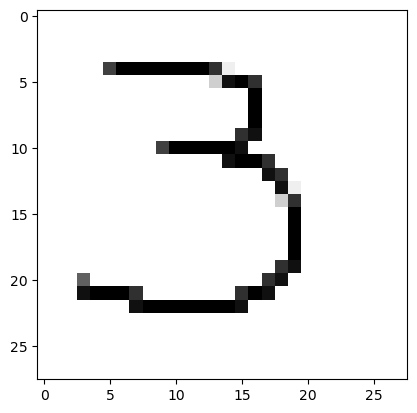

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
the number is probably a 5


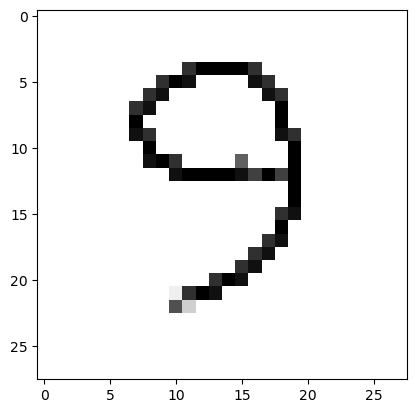

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
the number is probably a 7


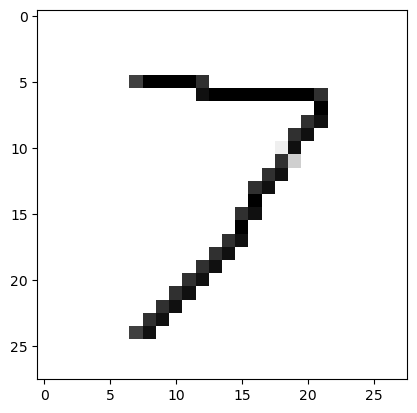

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
the number is probably a 5


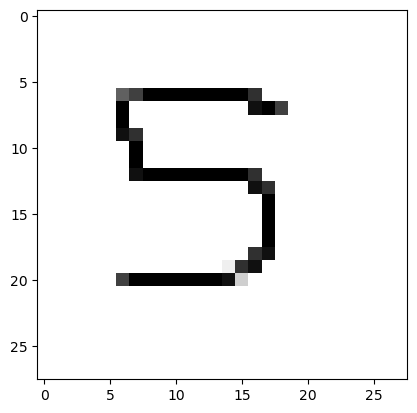

In [38]:
#while you have more images
while os.path.isfile(f"Hand written numbers/digit{image_number}.png"):
    try:
        #read the image
        img = cv2.imread(f"Hand written numbers/digit{image_number}.png")[:,:,0]
        #invert the colours (black to white and white to black) and make into an array
        img = np.invert(np.array([img]))
        #now predict the number of the image using the model
        prediction = model.predict(img)
        #print prediction np.argmax gives the field that has the highest number
        print(f"the number is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1